In [1]:
import pandas as pd
import numpy as np, os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import keras.backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load Data

In [2]:
folder_path = u'C:/Users/cricr/PycharmProjects/AI-project/features/128' 

# List all files in the folder
file_names = [file for file in os.listdir(folder_path) if file.endswith('_128.csv')]

# Initialize an empty DataFrame to concatenate all data
all_data = pd.DataFrame()
all_data_list = []
# Loop through each file and concatenate the data
for file_name in file_names:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    all_data_list.append(data)
    all_data = pd.concat([all_data, data], ignore_index=True)

# Now 'all_data_list' contains a list of all data from all CSV files

# Label mapping

In [3]:
#Sobstitute N, S, V with 0, 1, 2
label_mapping = {'N': 0, 'S': 1, 'V': 2}
for data in all_data_list:
    data['annotation'] = data['annotation'].replace(label_mapping)

# Divide train/test

In [4]:
# Split Data
#A list of all csv is gived: because each element of a list represent a patient,
# a patient will stay only or in train or in test
train_list, test_list = train_test_split(all_data_list, test_size=0.2, random_state=42)
train_list, val_list = train_test_split(train_list, test_size=0.2, random_state=42)

In [5]:
#Create a dataframe only for train and one for all test data
train_data = pd.DataFrame()
i = 0
for train in train_list:
    train_data = pd.concat([train_data, train], ignore_index=True)
    i = i + 1

In [6]:
# Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']

In [7]:
# One-hot encoding
one_hot_encoded_df = pd.get_dummies(y_train, columns=['annotation'])

one_hot_encoded_array_train = one_hot_encoded_df.values

print(one_hot_encoded_df)
print(one_hot_encoded_array_train)

           0      1      2
0      False   True  False
1       True  False  False
2      False   True  False
3       True  False  False
4       True  False  False
...      ...    ...    ...
67261  False  False   True
67262  False  False   True
67263   True  False  False
67264   True  False  False
67265   True  False  False

[67266 rows x 3 columns]
[[False  True False]
 [ True False False]
 [False  True False]
 ...
 [ True False False]
 [ True False False]
 [ True False False]]


In [8]:
#Create a dataframe only for train and one for all test data
val_data = pd.DataFrame()

for val in val_list:
    val_data = pd.concat([val_data, val], ignore_index=True)

In [9]:
X_val = val_data.drop('annotation', axis=1)
y_val = val_data['annotation']

In [10]:
one_hot_encoded_df_val = pd.get_dummies(y_val, columns=['annotation'])

one_hot_encoded_array_val = one_hot_encoded_df_val.values

In [11]:
test_data = pd.DataFrame()

for test in test_list:
    test_data = pd.concat([test_data, test], ignore_index=True)

In [12]:
X_test = test_data.drop('annotation', axis=1)
y_test= test_data['annotation']

In [13]:
one_hot_encoded_df_test = pd.get_dummies(y_test, columns=['annotation'])

one_hot_encoded_array_test = one_hot_encoded_df_test.values

In [14]:
y_train

0        1
1        0
2        1
3        0
4        0
        ..
67261    2
67262    2
67263    0
67264    0
67265    0
Name: annotation, Length: 67266, dtype: int64

In [15]:
(y_train == 0)

0        False
1         True
2        False
3         True
4         True
         ...  
67261    False
67262    False
67263     True
67264     True
67265     True
Name: annotation, Length: 67266, dtype: bool

In [16]:
(y_train == 0).sum()


58192

In [17]:
(y_val == 0).sum()

14243

In [18]:
(y_train == 1).sum()


5038

In [19]:
(y_val == 1).sum()

1126

In [20]:
(y_train == 2).sum()


4036

In [21]:
(y_test == 2).sum()

974

In [22]:
(y_test == 2).sum() + (y_test == 2).sum() 

1948

In [23]:
N_train = (y_train == 0).sum() 
S_train = (y_train == 1).sum() 
V_train = (y_train == 2).sum() 

N_val = (y_val == 0).sum() 
S_val = (y_val == 1).sum() 
V_val = (y_val == 2).sum() 

N_test = (y_test == 0).sum() 
S_test = (y_test == 1).sum() 
V_test = (y_test == 2).sum() 

N_perc = N_train/(N_train+S_train+V_train)
S_perc = S_train/(N_train+S_train+V_train)
V_perc = V_train/(N_train+S_train+V_train)
print(f"Perc di N in train: {N_perc}")
print(f"Perc di S in train: {S_perc}")
print(f"Perc di V in train: {V_perc}")

N_perc = N_val/(N_val+S_val+V_val)
S_perc = S_val/(N_val+S_val+V_val)
V_perc = V_val/(N_val+S_val+V_val)
print(f"Perc di S in val: {N_perc}")
print(f"Perc di S in val: {S_perc}")
print(f"Perc di S in val: {V_perc}")

N_perc = N_test/(N_test+S_test+V_test)
S_perc = S_test/(N_test+S_test+V_test)
V_perc = V_test/(N_test+S_test+V_test)
print(f"Perc di S in test: {N_perc}")
print(f"Perc di S in test: {S_perc}")
print(f"Perc di S in test: {V_perc}")


Perc di N in train: 0.8651027264888651
Perc di S in train: 0.07489667885707489
Perc di V in train: 0.06000059465406
Perc di S in val: 0.8760071345101175
Perc di S in val: 0.06925395165754351
Perc di S in val: 0.05473891383233901
Perc di S in test: 0.9161044034090909
Perc di S in test: 0.04066051136363636
Perc di S in test: 0.04323508522727273


# Model

In [24]:
def compute_class_freqs(labels):

    N = labels.shape[0]

    positive_frequencies = np.sum(labels, axis = 0) / N
    negative_frequencies = 1 - positive_frequencies

    return positive_frequencies, negative_frequencies

In [25]:
freq_pos, freq_neg = compute_class_freqs(one_hot_encoded_array_train)

print(f"pos freqs: {freq_pos}")

print(f"neg freqs: {freq_neg}")

pos freqs: [0.86510273 0.07489668 0.06000059]
neg freqs: [0.13489727 0.92510332 0.93999941]


In [26]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

In [27]:
#Custom loss function
#output loss function is the sum
#epsilon to not have log0

def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    def weighted_loss(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        # initialize loss to zero
        loss = 0.0

        for i in range(len(pos_weights)):
            
            loss += tf.keras.backend.mean(-(pos_weights[i] *y_true[:,i] * tf.keras.backend.log(y_pred[:,i] + epsilon)
                             + neg_weights[i]* (1 - y_true[:,i]) * tf.keras.backend.log( 1 - y_pred[:,i] + epsilon)))
        return loss
    return weighted_loss

In [28]:
#@title Calculating Weights
from sklearn.utils.class_weight import compute_class_weight

def calculating_class_weights(y_true):
    num_classes = y_true.shape[1]
    weights = np.empty([num_classes, 2])
    for i in range(num_classes):
        weights[i] = compute_class_weight(class_weight='balanced', classes=[0.,1.], y=y_true[:, i])
    return weights

class_weights = calculating_class_weights(one_hot_encoded_array_train)

keys = np.arange(0,9,1)
weight_dictionary_fold = dict(zip(keys, class_weights.T[1]))
weight_dictionary_fold

{0: 0.5779660434423975, 1: 6.675863437872171, 2: 8.333250743310208}

In [116]:
from keras.layers import BatchNormalization
model = Sequential()

# Input layer
model.add(Dense(64, activation="relu", input_shape=(len(all_data_list[0].columns) - 1,)))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(32, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))

# Output layer

model.add(Dense(3, activation='softmax'))

C:\Users\cricr\PycharmProjects\Ai-proj\.venv\Lib\site-packages\keras\src\layers\core\dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [117]:
model.compile(optimizer= tf.keras.optimizers.Adam(), 
              loss=get_weighted_loss(pos_weights, neg_weights), 
              metrics=['Accuracy', 'Precision', 'Recall' ])

In [118]:
#model.compile(optimizer= tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy', 'Precision', 'Recall' ])

In [119]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=20,          # Number of epochs with no improvement after which training will stop
    verbose=1,           # Verbosity mode (1 for printing messages)
    restore_best_weights=True  # Restore the best model weights when training stops
)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Replace with your chosen model

# Define the number of folds (e.g., 5)
k = 5

# Initialize the KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize a list to store the performance metrics for each fold
scores = []

# Iterate over the KFold splits
for train_idx, val_idx in kf.split(all_data_list):
    # Create train and validation sets for this fold
    train_fold = [all_data_list[i] for i in train_idx]
    val_fold = [all_data_list[i] for i in val_idx]
    
    # Split train and validation data into features and labels
    # Model Training
X_train = train_data.drop('annotation', axis=1)
y_train = train_data['annotation']
    X_train, y_train = extract_features_and_labels(train_fold)  # Replace with your data preparation code
    X_val, y_val = extract_features_and_labels(val_fold)  # Replace with your data preparation code
    
    # Initialize and train your machine learning model
    model = LogisticRegression()  # Replace with your chosen model
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate the performance metric (e.g., accuracy) for this fold
    accuracy = accuracy_score(y_val, y_pred)
    scores.append(accuracy)

# Calculate the mean and standard deviation of the performance scores
mean_accuracy = sum(scores) / k
std_deviation = np.std(scores)

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation:", std_deviation)

In [120]:
modelHistory = model.fit(X_train, 
                         one_hot_encoded_array_train, 
                         epochs=60, 
                         batch_size=16, 
                         validation_data=(X_val, one_hot_encoded_array_val),
                         class_weight = weight_dictionary_fold,
                         callbacks=[early_stopping] 
                         ).history

Epoch 1/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - Accuracy: 0.5976 - Precision: 0.6692 - Recall: 0.2374 - loss: 0.5400 - val_Accuracy: 0.6051 - val_Precision: 0.7023 - val_Recall: 0.4401 - val_loss: 0.3182
Epoch 2/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.7313 - Precision: 0.8193 - Recall: 0.6238 - loss: 0.4459 - val_Accuracy: 0.6880 - val_Precision: 0.7389 - val_Recall: 0.6107 - val_loss: 0.3055
Epoch 3/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.7420 - Precision: 0.8079 - Recall: 0.6636 - loss: 0.4180 - val_Accuracy: 0.6696 - val_Precision: 0.7038 - val_Recall: 0.6189 - val_loss: 0.3235
Epoch 4/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - Accuracy: 0.7484 - Precision: 0.8068 - Recall: 0.6757 - loss: 0.4108 - val_Accuracy: 0.6974 - val_Precision: 0.7369 - val_Recall: 0.6546 - val_loss: 0.3048
Epoch 5/60
4205/4205 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - Accuracy: 0.7460 - Precision: 0.8022 - Recall: 0.6793 - loss: 0.3929 - val_Accuracy: 0.6657 - v

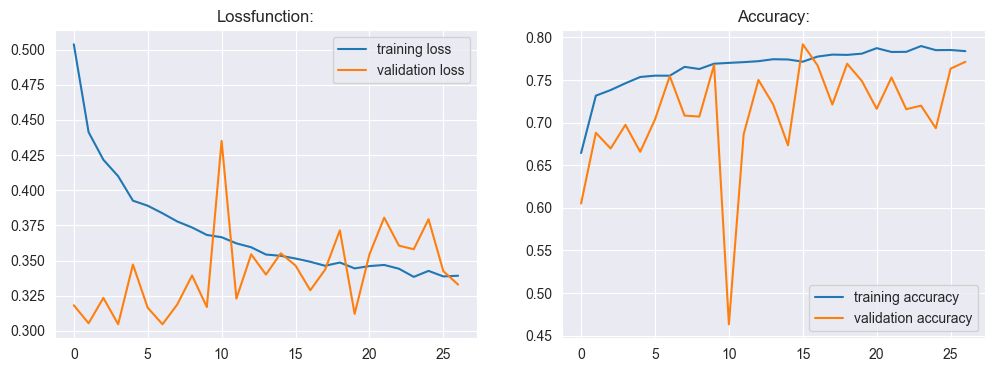

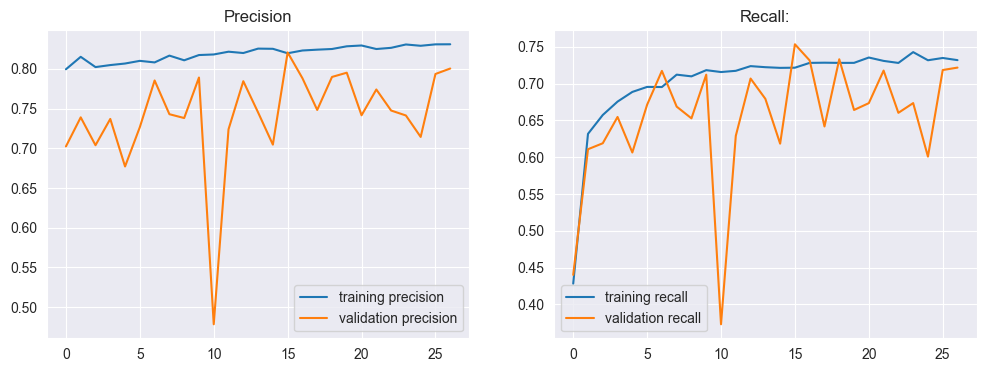

In [121]:
#plot performances
history = modelHistory
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['loss'], label="training loss")
plt.plot(history['val_loss'], label="validation loss")
plt.title('Lossfunction:')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Accuracy'], label="training accuracy")
plt.plot(history['val_Accuracy'], label="validation accuracy")
plt.title('Accuracy:')
plt.legend()

#plot performances
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history['Precision'], label="training precision")
plt.plot(history['val_Precision'], label="validation precision")
plt.title('Precision')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history['Recall'], label="training recall")
plt.plot(history['val_Recall'], label="validation recall")
plt.title('Recall:')
plt.legend()

# Evaluation

In [122]:
y_pred = model.predict(X_test)

704/704 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step


In [123]:
predicted_class = np.argmax(y_pred, axis=-1)

In [124]:
test_classes = np.argmax(one_hot_encoded_array_test, axis=-1)

In [125]:
cm = confusion_matrix(test_classes,predicted_class)

In [126]:
classes_name = ['N', 'S', 'V']

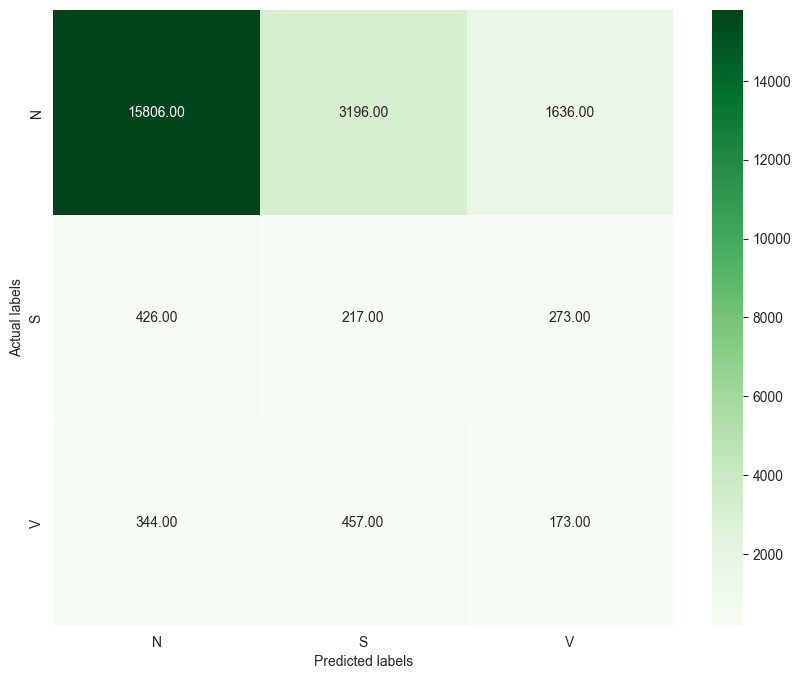

In [127]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()

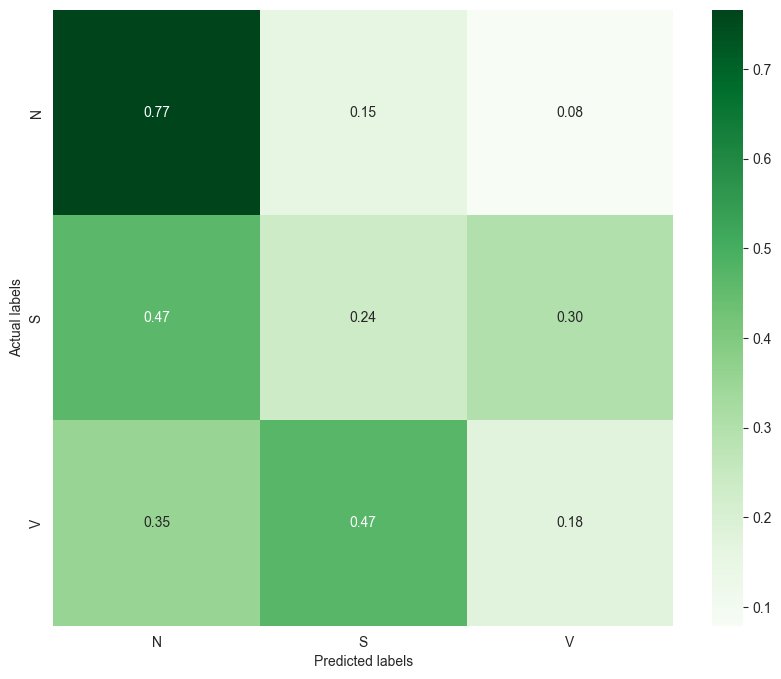

In [128]:
#Normalized cm

cm.sum(axis=1)

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,8))
sns.heatmap(cm, xticklabels=list(classes_name), yticklabels=list(classes_name), cmap="Greens", annot=True, fmt='.2f')
plt.ylabel('Actual labels')
plt.xlabel('Predicted labels')
plt.show()